# Advanced Linear Regression- Predict
**Predicting the average price per kilogram of Golden Delicious Apples**



## Introduction


**Background**

In a Fresh Produce Industry, How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season? 


The aim of this project is to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

For the predictions, the train-set data will be used. 

**The variable to be predicted(y) is** Average Price per Kg

## Import modules

In [79]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Model slection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
#%matplotlib notebook
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px



# Other
from scipy import stats
import math
import pickle
import numpy as np
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D (state 'mpld3.enable_notebook()' in every cell you plot something), if we going to do 3D visual

## Load Dataset


In [2]:
train_df = pd.read_csv('df-train_set.csv')
test_df = pd.read_csv('df-test_set.csv')


In [3]:
train = train_df.copy() # To ensure that changes made within this notebook are only applied to the copy and not the original data
test = test_df.copy()

test_ID = test['Index']
test = test.drop('Index', axis=1)

## Exploratory Data Analysis


First, we look at the first few rows of our **train dataset**

In [4]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


Extracting data relating to Goldern Delicious Apples

In [5]:
df_train= train[train['Commodities']=='APPLE GOLDEN DELICIOUS']
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We can take a look at the dimensions of the train set to get an idea of the number of rows (n) and nummber of predictors (p) which is equal to one less than the number of columns.

In [6]:
df_train.shape

(1952, 13)

The shape command shows us that the train data has 1952 rows of data and 13 variables. We will try and model the price per kilogram of Golden Delicious Apples using the other 12 variables.

In the above dataframe, there appears to be no sign of missing values. The Pandas library can help us investigate this further, using the `info()` function. This function tells us what columns are in the dataframe, how many null values they have and what datatype they are. We will also use the `isnul().sum()` pandas function to confirm the number of missing values in each column. 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [8]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

From the information generated, we can see that all columns contain 64376 entries, and have no missing values.


### Non-Graphical Analysis




**Univariate Analysis**

Both kurtosis and skew are important statistical terms in data science. Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.  Skew will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa">here</a>.
</div>

We use the following commands to determine the skew and kurtosis of our data:

    - df.skew()
    - df.kurtosis()

In [9]:
df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

It appears that only `ave_price_per_kg` (our target) is fairly symmetrical. The rest of our features appear to be highly skewed in the positive direction.

In [10]:
df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

Using the `describe()` method from pandas, we to get the descriptive statistics for our features:

There is a clear indication of a presence of outliers in all our features, and no outliers in our tartget. 


In [11]:
df_train.describe()


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


**Multivariate Analysis**

For this analysis, we determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.

Here, we use Pearson correlation which **measures the linear relationship between features and assumes that the features are normally distributed**.

The following figure can beused to interpret the Pearson correlation measure:


<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>


We use the `df_train.corr()` command to determine the correlation between features.

In [12]:
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


### Graphical Analysis

**Univariate Analysis**

We determine the **distribution** of our numerical features using the following:
- Histogram
- Density plot

For a categorical feature we will use a:
- Bar Graph

##### Histogram and Density Plot

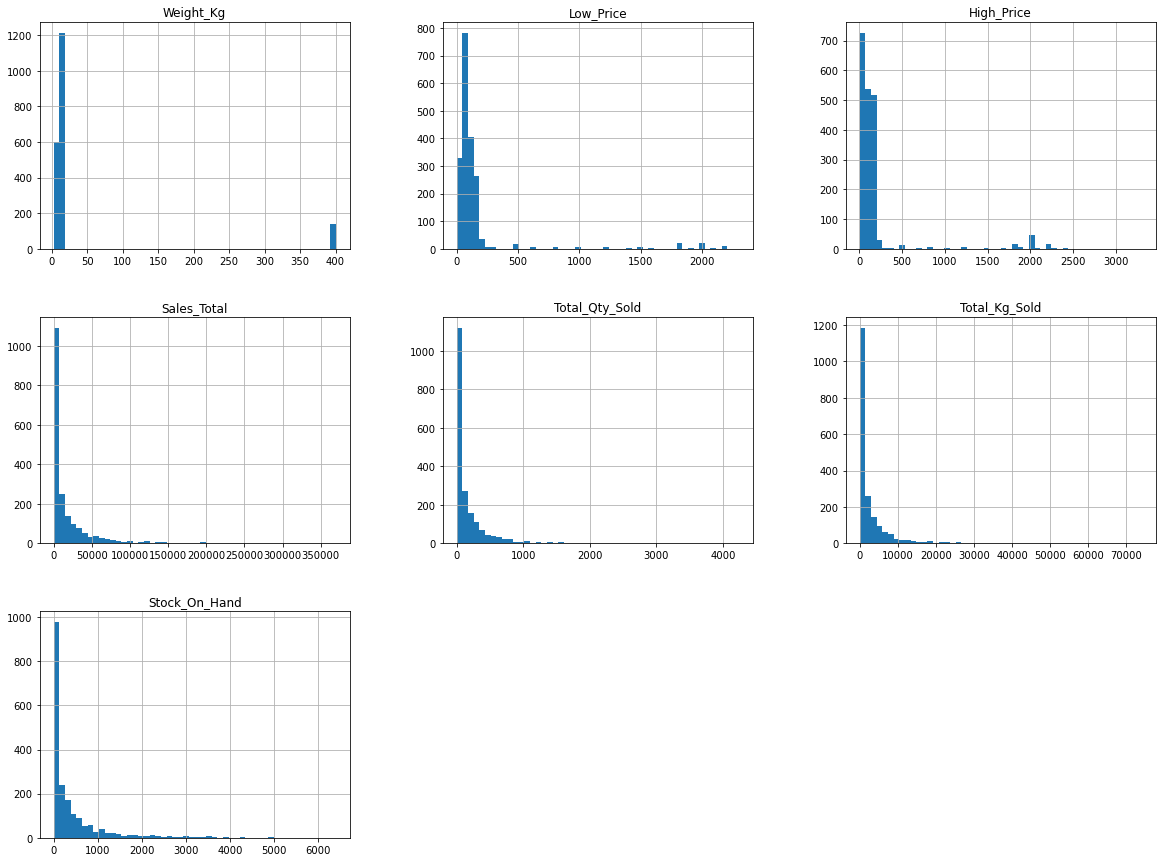

In [13]:
features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand'] # create a list of all numerical features
df_train[features].hist(bins=50, figsize=(20,15), color = 'tab:blue' );


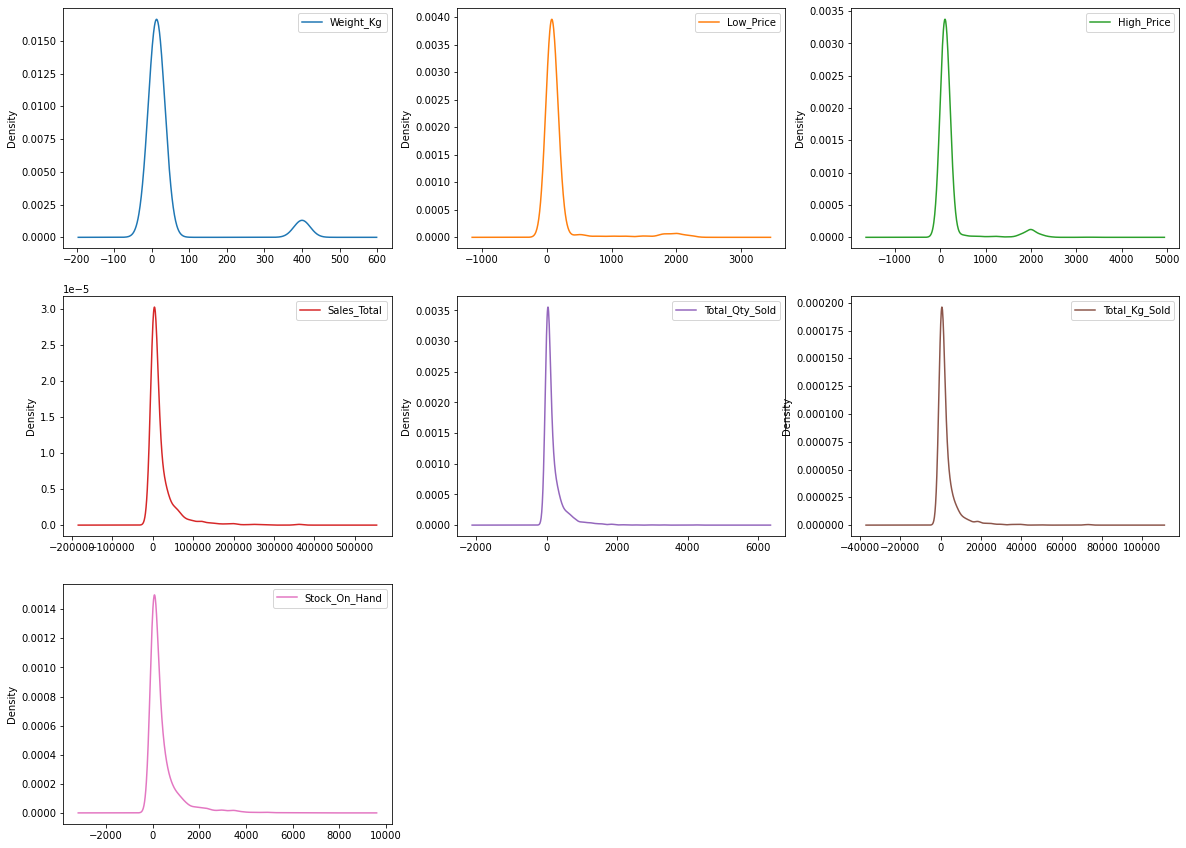

In [14]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(20, 15));

The histogram and density plot confirms the high positive skew in of feature, as well as the presence of outliers.

##### Bar plot

For the categorical features, we can create a **bar plot** to display the frequency distribution. 

We'll generate a bar plot of the `Size_Grade` feature, where each bar represents unique size grade of apples from the data, and the height represents how many times that size grade occurred. This can be done by using seaborn's `countplot`.  

In [15]:
sns.countplot?

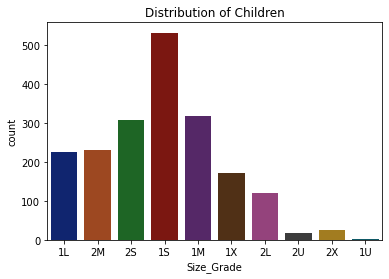

In [16]:
sns.countplot(x = 'Size_Grade', data = df_train, palette="dark")
plt.title("Distribution of Children");

**Multivariate Analysis**

For the multivariate graphical analysis the following visualisations will be considered:

- Heatmap
- Scatter Plot

##### Heatmap
The relationship (correlation) between features (previosly determined by the `df_train.corr()` command)can also be displayed graphically using a heatmap. We use the Seaborn library for this basic heatmap visualisation.


The correlation coefficient value will be displayed on the heatmap using the `vmin` and `vmax` parameters.

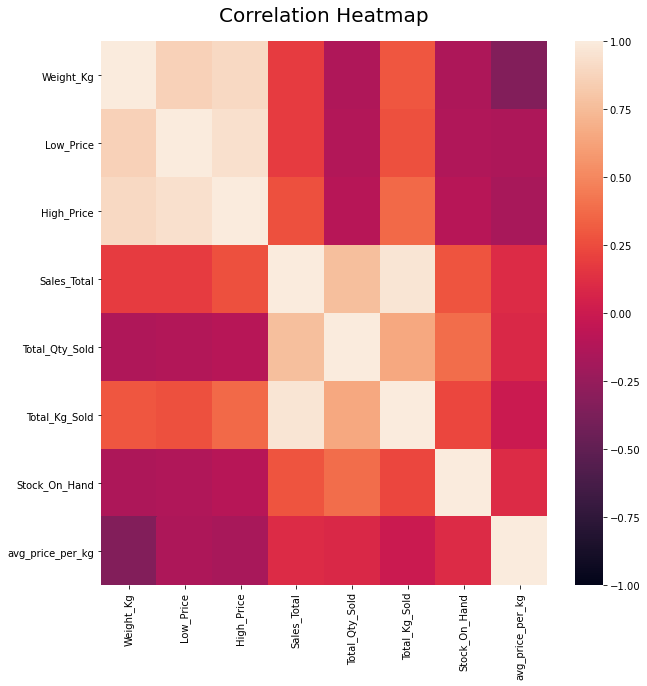

In [17]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

Let's now have a quick look at our test data

In [18]:
df_test= test[test['Commodities']=='APPLE GOLDEN DELICIOUS']
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [19]:
df_test.shape

(685, 12)

## Feature Selection


Feature selection is the process of choosing the most relevant features in your data when developing a predictive model. "Most relevant" depends on many factors. Here we consider the correlation of the features with the target variable, as well as the variance of the features. We look for the highest correlation with the target, and the features with the most variance. During this process, we remove features that do not maximize model performance.



Before we begin the process, let us take a look at the distribution of our target variable `avg_price_per_kg`:

C:\Users\msntu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

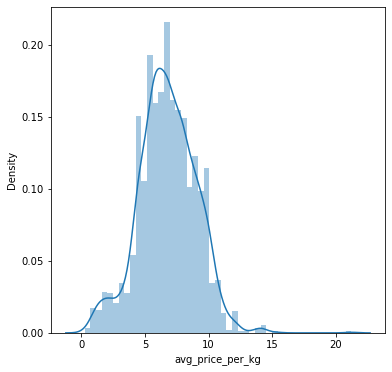

In [20]:
# target distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['avg_price_per_kg'],kde=True)

The data seems to be fairly distributed around the mean.

### Prepocessing

##### Dropping columns

In [21]:
df_train = df_train.drop(['Date', 'Commodities'], axis=1)
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50


Reasons for dropping columns `Date` and `Commodities`:

- `Date` was removed to improve accuracy, since none of the dates were significantly correlated with the response variable `avg_price_per_kg`. Continued use of the date column significantly increased the number of our features, and caused some inefficiencies.
- Upon doing dummy encoding on all the data, the `Commodities` column ended up with 1's, making it a redundant variable.

We do the same for test data:

In [22]:
df_test = df_test.drop(['Date', 'Commodities'], axis=1)
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50


##### Adding Columns

We create `Sales_per_Qty_Sold` using `Sales_Total` and `Total_Qty_Sold`. This is in the attempt to scale the "currency" features, `High_Price`,`Low_Price`, `Sales_Total`, making them comparable.



In [23]:
df_train['Sales_per_Qty_Sold'] =(df_train['Sales_Total'] / df_train['Total_Qty_Sold']).round(decimals=2)
df_train_new = df_train.drop([ 'Total_Qty_Sold',  'Sales_Total'], axis=1)
df_train_new.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Sales_per_Qty_Sold
1,CAPE,M4183,1L,18.3,150.0,170.0,6075.6,822,8.51,155.75
7,CAPE,JG110,2M,11.0,50.0,50.0,3520.0,0,4.55,50.00
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,162.0,1506,6.11,55.00
40,CAPE,M4183,1S,18.3,80.0,120.0,7100.4,443,4.51,82.53
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,400.0,2,4.50,1800.00


The same needs to be done for the test data, to ensure consistency.

In [24]:
df_test['Sales_per_Qty_Sold'] =(df_test['Sales_Total'] / df_test['Total_Qty_Sold']).round(decimals=2)
df_test_new = df_test.drop([ 'Total_Qty_Sold','Sales_Total'], axis=1)
df_test_new.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Total_Kg_Sold,Stock_On_Hand,Sales_per_Qty_Sold
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,128.0,136.0,456.0,0,131.79
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,220.0,220.0,146.4,2,220.00
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,120.0,120.0,72.0,45,120.00
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,160.0,160.0,18.3,8,160.00
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,140.0,160.0,1830.0,19,141.40


As previously determined, there is a presence of outliers in our features. Outliers are defined as data points that differ significantly from other observations, thus affecting the range and distribution of data. Machine learning models are sensitive to the range and distribution of data. We want our model to learn from the actual trend and not the noise. By removing outlier we attempt to reduce th noise in the data.

Seeing that our features are not symmetric (normally distributed), use the **Interquartile Range** method to determine and remove the outliers. The following function removes outliers from all the features:


##### Outliers

As previously determined, there is a presence of outliers in our features. Outliers are defined as data points that differ significantly from other observations, thus affecting the range and distribution of data. Machine learning models are sensitive to the range and distribution of data. We would want our model to learn from the actual trend and not the noise. This time, however, the removal of outliers did not improve the perfomance of our models. The removal thereof seem to be removing some of the data necessary for the prediction of the price per kg of Apples.

### Dummy Encoding Variables

In the process of model prediction, all variables need to be numeric. As we've observed that, our data contains some categorical/text data (Province, Container, Size_Grade), which we need to transform into numbers before we can train our model. To do this, we use a Pandas method called `get_dummies()`. The method will transform all the categorical text data into numbers by adding a column for each distinct category

In [25]:
dummy_df_train = pd.get_dummies(df_train_new,drop_first = True)
dummy_df_train.head()

,Weight_Kg,Low_Price,High_Price,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Sales_per_Qty_Sold,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,6075.6,822,8.51,155.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,3520.0,0,4.55,50.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,162.0,1506,6.11,55.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,7100.4,443,4.51,82.53,0,0,0,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,400.0,2,4.50,1800.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# split data into predictors and response 
X = dummy_df_train.drop('avg_price_per_kg', axis=1)
y = dummy_df_train['avg_price_per_kg']

### Variable Selection by Correlation and Significance
Using the dummy variable dataframe, we can build a model that predicts Average Apple Price per Kilogram as a function of 177 different independent variables (features).

Before we do this, however, we reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [27]:
column_titles = [col for col in dummy_df_train.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df_train=dummy_df_train.reindex(columns=column_titles) # reindex the DataFrame

In [28]:
dummy_df_train.head()

,Weight_Kg,Low_Price,High_Price,Total_Kg_Sold,Stock_On_Hand,Sales_per_Qty_Sold,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,6075.6,822,155.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,3520.0,0,50.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.55
24,9.0,55.0,55.0,162.0,1506,55.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6.11
40,18.3,80.0,120.0,7100.4,443,82.53,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,400.0,2,1800.00,1,0,0,0,...,0,1,0,0,0,0,0,0,0,4.50


For guidance in terms of choosing the best predictors, we look at the correlation between `avg_price_per_kg` and each of the other features in our train dataset and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are.

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [29]:
corrs1 = pd.DataFrame(dummy_df_train.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs1.sort_values(by='Correlation',ascending=False, inplace=True)
corrs1

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Stock_On_Hand,0.105028
Container_EG140,0.023753
Container_M6125,0.007568


In [30]:
# Calculate correlations between predictor variables and the response variable
corrs = dummy_df_train.corr()['avg_price_per_kg'].sort_values(ascending=False)

Using [Pearson regression](http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/) from SciPy, we calculate the p-values of each feature. 

In [31]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(dummy_df_train[col], dummy_df_train['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.05] #significance level

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Sales_per_Qty_Sold,-0.159818,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.  

If we were to use a logic test with a significance level of 5% (p-value < 0.05). The output returned above are features that with p-values < 0.05

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame `X_data
`

In [32]:
# The dependent variable remains the same:
y_data = dummy_df_train['avg_price_per_kg'] 


X_data = dummy_df_train.drop('avg_price_per_kg', axis=1)

In [33]:
# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = X_data[X_names]

In [70]:
# create the correlation matrix
# and find rows and columns  where correlation coefficients > 0.9 or <-0.9
corr1 = X_data.corr()
r, c = np.where(np.abs(corr1) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr1.iloc[r[off_diagonal], c[off_diagonal]]

,Sales_per_Qty_Sold,Low_Price,Weight_Kg,Container_IA400,Sales_per_Qty_Sold,Container_IA400,Sales_per_Qty_Sold,Weight_Kg
Low_Price,0.959368,1.000000,0.863182,0.860219,0.959368,0.860219,0.959368,0.863182
Sales_per_Qty_Sold,1.000000,0.959368,0.911184,0.908089,1.000000,0.908089,1.000000,0.911184
Sales_per_Qty_Sold,1.000000,0.959368,0.911184,0.908089,1.000000,0.908089,1.000000,0.911184
Sales_per_Qty_Sold,1.000000,0.959368,0.911184,0.908089,1.000000,0.908089,1.000000,0.911184
Weight_Kg,0.911184,0.863182,1.000000,0.999231,0.911184,0.999231,0.911184,1.000000
Weight_Kg,0.911184,0.863182,1.000000,0.999231,0.911184,0.999231,0.911184,1.000000
Container_IA400,0.908089,0.860219,0.999231,1.000000,0.908089,1.000000,0.908089,0.999231
Container_IA400,0.908089,0.860219,0.999231,1.000000,0.908089,1.000000,0.908089,0.999231


There seems to be a presence of auto-correlation in our data set. We have not dropped any of these features as the dropping thereof caused inaccuracies in our predictions.

### Variable Selection by Variance Thresholds



Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

Variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [72]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [73]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.02)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.02)

In [74]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)] #will create a list of dictionaries
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
0,Container_M4183,0.210490
12,Container_JE090,0.205667
3,Container_EC120,0.176834
1,Province_W.CAPE-BERGRIVER ETC,0.174600
4,Size_Grade_1M,0.136715
14,Size_Grade_2S,0.132890
9,Size_Grade_2M,0.104727
11,Province_EASTERN CAPE,0.094396
2,Size_Grade_1X,0.079928
15,Container_IA400,0.066138


Next we need to extract the results and use them to select our new columns - which form a subset of all the columns

In [38]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]] # what does this line do?

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Container_M4183,Province_W.CAPE-BERGRIVER ETC,Size_Grade_1X,Container_EC120,Size_Grade_1M,Container_EF120,Size_Grade_2L,Container_JG110,Low_Price,Size_Grade_2M,Sales_per_Qty_Sold,Province_EASTERN CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064404,0.0,0.053390,0.0,0.0,0.038539,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.020888,1.0,0.015937,0.0,0.0,0.020151,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023064,0.0,0.017708,0.0,1.0,0.015113,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033943,0.0,0.027458,0.0,0.0,0.038539,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.782419,0.0,0.635720,1.0,0.0,1.000000,0.0,1.0,0.0


We then subset our train data for the new columns.

In [39]:
X_names = list(X_new.columns)

X_data = X_data[X_names]

X_data

,Container_M4183,Province_W.CAPE-BERGRIVER ETC,Size_Grade_1X,Container_EC120,Size_Grade_1M,Container_EF120,Size_Grade_2L,Container_JG110,Low_Price,Size_Grade_2M,Sales_per_Qty_Sold,Province_EASTERN CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
1,1,0,0,0,0,0,0,0,150.0,0,155.75,0,0,18.3,0,0,0
7,0,0,0,0,0,0,0,1,50.0,1,50.00,0,0,11.0,0,0,0
24,0,1,0,0,0,0,0,0,55.0,0,55.00,0,1,9.0,1,0,0
40,1,0,0,0,0,0,0,0,80.0,0,82.53,0,0,18.3,0,0,0
69,0,0,0,0,0,0,0,0,1800.0,0,1800.00,1,0,400.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,0,0,0,1,0,0,0,0,96.0,0,96.00,0,0,12.0,0,0,1
64291,1,0,1,0,0,0,0,0,130.0,0,130.00,0,0,18.3,0,0,0
64297,0,0,0,0,0,0,0,0,50.0,1,51.01,0,1,9.0,0,0,0
64304,0,0,0,0,0,0,0,1,30.0,1,30.57,0,0,11.0,0,0,0


## Training

In [75]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    # Compute the array containing the 10-folds CV MSEs
    MSE_CV_scores = - cross_val_score(model, X_train, y_train, cv= 10,
            scoring='neg_mean_squared_error',
            n_jobs = -1)

    # Compute the 10-folds CV RMSE
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    
    result = {'RMSE_CV': RMSE_CV, 'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return result

In [41]:
# declearing preditors and response for training
X = X_data
y = dummy_df_train['avg_price_per_kg']


We used the following models in our training phase

### Linear Regression

In [76]:
# Instantiate linear regression model
lm = LinearRegression(n_jobs=-1)

# fit the model to the data and make predictions
fit_and_evaluate(lm,X,y)

{'RMSE_CV': 15684349.550776783,
 'Train RMSE': 1.4477608373376543,
 'Train R^2': 0.5933838029451428,
 'Test RMSE': 1.5047850757789583,
 'Test R^2': 0.5119990710192439}

### Decision Tree

In [44]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 2,random_state=8) 

# # fit the model to the data and make predictions
fit_and_evaluate(regr_tree,X,y)

{'RMSE_CV': 0.285126383365419,
 'Train RMSE': 0.1498998238007807,
 'Train R^2': 0.9956409357549066,
 'Test RMSE': 0.15140532705077342,
 'Test R^2': 0.9950596921827958}

### Random Forest 

In [77]:
# instantiate RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 11, min_samples_leaf=2, random_state= 28) #random forest reduces the Variance

# # fit the model to the data and make predictions
fit_and_evaluate(rf,X,y)

{'RMSE_CV': 0.36283618955535846,
 'Train RMSE': 0.1813416411127653,
 'Train R^2': 0.9936205078331733,
 'Test RMSE': 0.15294381064904056,
 'Test R^2': 0.9949587816162686}

### KNeighbors

In [48]:
# instantiate KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

# fit the model to the data and make predictions
fit_and_evaluate(neigh, X, y)

{'RMSE_CV': 0.41755792373242007,
 'Train RMSE': 0.18386945275556338,
 'Train R^2': 0.9934414143857624,
 'Test RMSE': 0.36728430697259257,
 'Test R^2': 0.9709278973596603}

### AdaBoost

In [81]:
# instantiate AdaBoostRegressor
AB = AdaBoostRegressor(base_estimator= regr_tree, learning_rate= 0.2 ,random_state=0, n_estimators=100)

# fit the model to the data and make predictions
fit_and_evaluate(AB,X,y)

{'RMSE_CV': 0.26152523382535947,
 'Train RMSE': 0.015584107464943209,
 'Train R^2': 0.9999528854666674,
 'Test RMSE': 0.10072606265909838,
 'Test R^2': 0.9978134701333187}

### GradientBoosting

In [82]:
# instantiate GradientBoostingRegressor
grad_boost = GradientBoostingRegressor(learning_rate = 0.1, max_depth= 4, min_samples_leaf= 4,random_state=4)

# fit the model to the data and make predictions
fit_and_evaluate(grad_boost,X,y)

{'RMSE_CV': 0.27857740413641535,
 'Train RMSE': 0.13666368434120518,
 'Train R^2': 0.9963767585617579,
 'Test RMSE': 0.15522755581165448,
 'Test R^2': 0.9948071074478003}

### CatBoost

In [83]:
# instantiate CatBoostRegressor
cat_boost = CatBoostRegressor(learning_rate = 0.2, max_depth= 7,random_state=2, verbose=0)

# fit the model to the data and make predictions
fit_and_evaluate(cat_boost,X,y)

{'RMSE_CV': 0.35782170230183136,
 'Train RMSE': 0.011078727084572604,
 'Train R^2': 0.9999761893773101,
 'Test RMSE': 0.19115391347388586,
 'Test R^2': 0.9921252262384593}

### Bagging

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

# instantiate BaggingRegressor
bg = BaggingRegressor(base_estimator= regr_tree, n_estimators=400, random_state= 3)

# fit the model
bg.fit(X_train,y_train)

# make predictions
train_pred = bg.predict(X_train) 
test_pred = bg.predict(X_test)

train_rmse = rmse(y_train, train_pred) 
test_rmse = rmse(y_test, test_pred)

train_r2 = r_squared(y_train, train_pred) 
test_r2 = r_squared(y_test, test_pred) 
df_bagg = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}

df_bagg

{'Train RMSE': 0.18741297143085653,
 'Train R^2': 0.993186185313367,
 'Test RMSE': 0.15950494684105945,
 'Test R^2': 0.994516977708632}

### Voting Regressor

In [55]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [('AB', AB),("cat", cat_boost), ("grad_boost", grad_boost), ('rf', rf), ('regr', regr_tree), ('bg', bg)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.15, 0.15, 0.3,0.1,0.15,0.15])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

# fit the model to the data and make predictions
fit_and_evaluate(v_reg, X, y)

{'RMSE_CV': 0.2699622829826022,
 'Train RMSE': 0.09701853162575011,
 'Train R^2': 0.9981740014863062,
 'Test RMSE': 0.09480054184983895,
 'Test R^2': 0.9980631618206633}

### Hyperparameter Tuning

We used the GridSearchCV to determine the best hyperparameters of some models above.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

# Define the grid of hyperparameters 'params_dt'
params_rf = {
#'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
'max_depth': [1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15],
'min_samples_leaf': [1,2,3,4,5,6, 7, 8,9,10]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_rf = GridSearchCV(estimator= regr_tree,
param_grid=params_rf,
scoring='neg_mean_squared_error',
cv=10,
n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_rf.fit(X_train, y_train)
#fit_and_evaluate(grid_rf, X, y)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=2,
                                             random_state=8),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [58]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 10, 'min_samples_leaf': 2}


In [59]:
# Extract best model from 'grid_dt'
best_model = grid_rf.best_estimator_
# Evaluate test set accuracy
#test_acc = best_model.mean_squared_error(X_test,y_test)
fit_and_evaluate(best_model, X, y)

{'RMSE_CV': 0.285126383365419,
 'Train RMSE': 0.1498998238007807,
 'Train R^2': 0.9956409357549066,
 'Test RMSE': 0.15140532705077342,
 'Test R^2': 0.9950596921827958}

The performing model was determined using the ensemble method `VotingRegressor`, which returned the waighted average of or best performing models. Bellow we use `v_reg` determined through the use of `VotingRegressor` to make predictions on the test data. 

`v_reg` returned the lowest Test RMSE at 0.09480.  

## Predicting on Test Set

In [84]:
df_train.shape,df_test.shape

((1952, 12), (685, 11))

In [85]:
X_real = pd.get_dummies(df_test_new)[X_names]


X_real.head()

,Container_M4183,Province_W.CAPE-BERGRIVER ETC,Size_Grade_1X,Container_EC120,Size_Grade_1M,Container_EF120,Size_Grade_2L,Container_JG110,Low_Price,Size_Grade_2M,Sales_per_Qty_Sold,Province_EASTERN CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
0,0,1,0,1,1,0,0,0,128.0,0,131.79,0,0,12.0,0,0,0
1,1,1,1,0,0,0,0,0,220.0,0,220.00,0,0,18.3,0,0,0
2,0,1,0,1,0,0,0,0,120.0,0,120.00,0,0,12.0,0,0,0
3,1,1,0,0,1,0,0,0,160.0,0,160.00,0,0,18.3,0,0,0
4,1,1,0,0,0,0,0,0,140.0,0,141.40,0,0,18.3,0,0,0


In [86]:
v_reg_preds = v_reg.predict(X_real).round(2) # based on db without date

In [88]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg':v_reg_preds
    })

In [89]:
submission


,Index,avg_price_per_kg
0,1,10.86
1,2,11.99
2,3,9.99
3,4,8.73
4,5,7.75
...,...,...
680,681,3.26
681,682,10.04
682,683,6.10
683,684,7.58


In [92]:
submission.to_csv("testing(v_reg_pred).csv", index=False)

## Conclusion 

Using this approach we managed to get a RMSE score of 0.27574 on the full test data set and a $R^2$ of 0.998063.

Our two best scores for this challenge were 0.28531 and 0.27574.